In [31]:
#importing necessary libraries

#for numerical operations
import pandas as pd
import numpy as np

#for graphical visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
sms_df = pd.read_csv('spam.csv' , encoding = "ISO-8859-1" )

In [33]:
sms_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [34]:
sms_df.shape

(5572, 5)

In [35]:
sms_df.size

27860

In [36]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
sms_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [38]:
#random 5 records
sms_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5114,ham,Argh why the fuck is nobody in town ;_;,NaN,NaN,NaN
4980,ham,I said its okay. Sorry,NaN,NaN,NaN
2749,ham,You said not now. No problem. When you can. Le...,NaN,NaN,NaN
2616,ham,I went to ur hon lab but no one is there.,NaN,NaN,NaN
5353,ham,Guai... ÌÏ shd haf seen him when he's naughty....,NaN,NaN,NaN


In [39]:
'''
Note -
all of the columns are of object type,
thus we need to convert them into numeric type
because model only takes numeric valus for prediction
'''

sms_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [40]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
sms_df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [42]:
#Dropping Columns
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1, inplace =True)

In [43]:
print(sms_df.columns)

Index(['v1', 'v2'], dtype='object')


In [44]:
#Checking after dropping columns
sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
#renaming the column names
sms_df.rename(columns={'v1':'target' , 'v2' : 'sms'}, inplace = True )

In [46]:
sms_df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
#Check for duplicated values
sms_df[sms_df.duplicated()]

,target,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [48]:
sms_df.duplicated().sum()

np.int64(403)

In [49]:
#Before removing duplicate records
sms_df.shape

(5572, 2)

In [50]:
sms_df.drop_duplicates(inplace = True)

In [51]:
# after removing duplicate records
sms_df.shape

(5169, 2)

In [52]:
#Exploratory data analysis
sms_df.columns

Index(['target', 'sms'], dtype='object')

In [53]:
sms_df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [54]:
#in percentage
sms_df['target'].value_counts(normalize=True)*100

target
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64

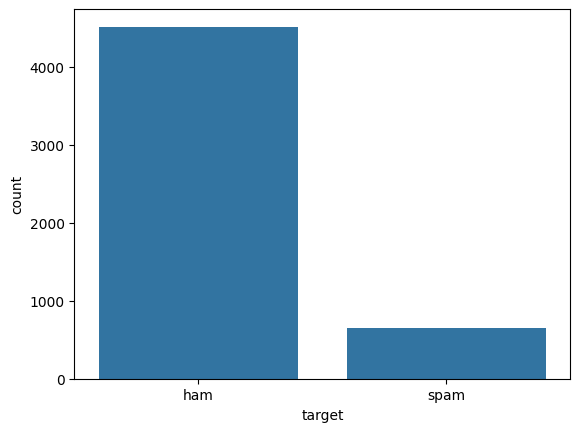

In [55]:
# data is unbalanced
sns.countplot(x=sms_df['target'])
plt.show()

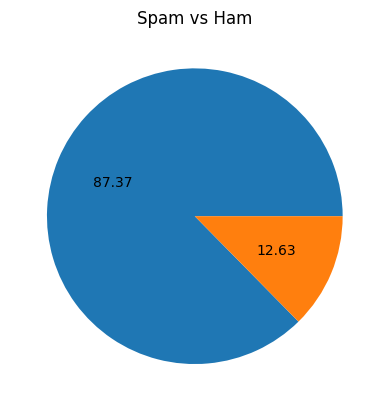

In [56]:
#Calculating individual % of each category of "Species" column
plt.pie(x=sms_df['target'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

In [57]:
from wordcloud import WordCloud

In [58]:
plt.figure(figsize=(30,30)) 
wc=WordCloud(width=2000,height=1000,background_color='black')

<Figure size 3000x3000 with 0 Axes>

In [59]:
#for spam sms
spam_wc =wc.generate(sms_df[sms_df['target']=='spam']['sms'].str.cat(sep=""))
spam_wc

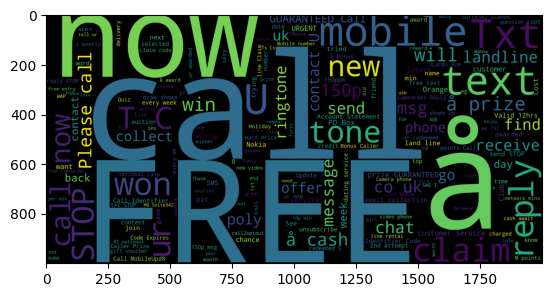

In [60]:
plt.imshow(spam_wc)
plt.show()

In [61]:
#for ham sms
ham_wc = wc.generate(sms_df[sms_df['target']=='ham']['sms'].str.cat(sep=""))
ham_wc

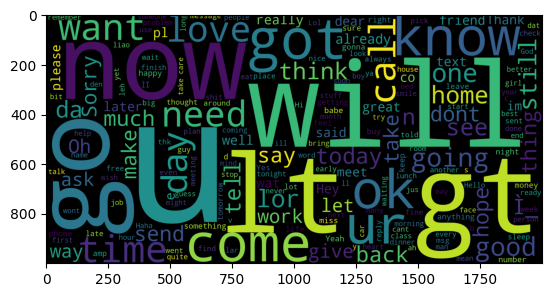

In [62]:
plt.imshow(ham_wc)
plt.show()

In [63]:
#Converting text data into numeric form
#Converting spam as 1 and ham as 0
sms_df['target']=sms_df['target'].map({'spam':1 , 'ham':0})

In [64]:
#After changes
sms_df['target'].unique()

array([0, 1])

In [65]:
sms_df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
import string

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [69]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
def transform_sms(message):
    # Convert all characters to lowercase
    message = message.lower()

    # Break SMS record into words
    message = nltk.word_tokenize(message)

    # Remove special symbols (keeping only alphanumeric characters)
    temp = [i for i in message if i.isalnum()]

    # Removing stopwords and punctuations
    temp = [i for i in temp if i not in stopwords.words('english') and i not in string.punctuation]

    # Stemming
    temp = [ps.stem(i) for i in temp]

    # Return the transformed message as a single string
    return " ".join(temp)


In [71]:
#Calling function transform_sms by passing sms records
# Apply the transformation to the 'sms' column
sms_df['sms_transformed'] = sms_df['sms'].apply(transform_sms)


In [72]:
sms_df.head()

,target,sms,sms_transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [73]:
#Now spam is equal to 1
spam_wc = wc.generate(sms_df[sms_df['target'] == 1]['sms_transformed'].str.cat(sep=" "))
spam_wc

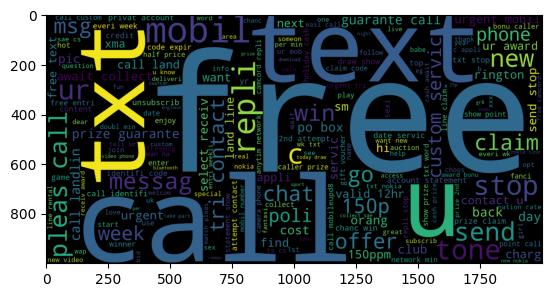

In [74]:
#Top 10 most used words in spam sms
plt.imshow(spam_wc)
plt.show()

In [75]:
#For storing most used words
most_used_spam_words = []

#.tolist() -> to convert 'series' object into 'list'
spam_list = sms_df[sms_df['target']==1]['sms_transformed'].tolist()

#accesssing each individual elements from spam_list
for sentence in  spam_list:

    #accessing each individual word from list elements
    for word in sentence.split():
        most_used_spam_words.append(word)

In [76]:
#used for finding most common words
from collections import Counter

In [77]:
top_10 = pd.DataFrame(Counter(most_used_spam_words).most_common(10))

In [78]:
print(top_10)

       0    1
0   call  320
1   free  191
2      2  155
3    txt  141
4   text  122
5      u  119
6     ur  119
7  mobil  114
8   stop  104
9  repli  103


C:\Users\DELL\AppData\Local\Temp\ipykernel_9876\3632305444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[0], y=top_10[1], palette=colors)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9876\3632305444.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_10[0], y=top_10[1], palette=colors)


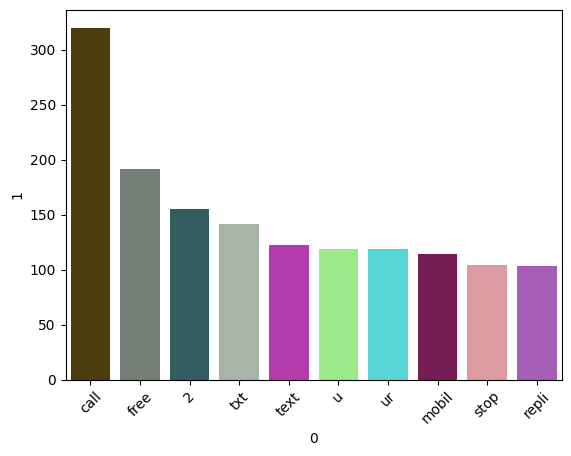

In [79]:
# Generate random colors
colors = np.random.rand(len(top_10), 3)  # Random RGB colors

# Create the bar plot with different colors
sns.barplot(x=top_10[0], y=top_10[1], palette=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [80]:
sms_df.head()

,target,sms,sms_transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [81]:
#On ham records
ham_wc = wc.generate(sms_df[sms_df['target'] == 0]['sms_transformed'].str.cat(sep=" "))
ham_wc

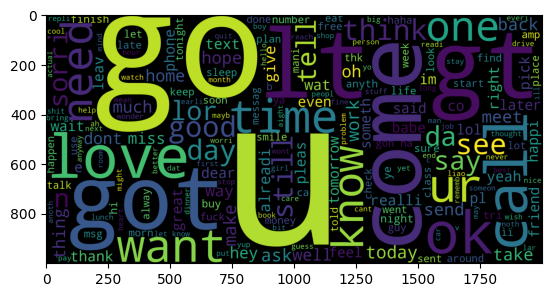

In [82]:
plt.imshow(ham_wc)
plt.show()

In [83]:
#For storing most used words
most_used_ham_words = []

#.tolist() -> to convert 'series' object into 'list'
ham_list = sms_df[sms_df['target']==0]['sms_transformed'].tolist()

#accesssing each individual elements from spam_list
for sentence in  ham_list:

    #accessing each individual word from list elements
    for word in sentence.split():
        most_used_ham_words.append(word)

In [84]:
top_10_ham = pd.DataFrame(Counter(most_used_ham_words).most_common(10))

In [85]:
print(top_10_ham)

      0    1
0     u  883
1    go  404
2   get  349
3    gt  288
4    lt  287
5     2  284
6  come  275
7   got  236
8  know  236
9  like  234


C:\Users\DELL\AppData\Local\Temp\ipykernel_9876\368693661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_ham[0], y=top_10_ham[1], palette=colors)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9876\368693661.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_10_ham[0], y=top_10_ham[1], palette=colors)


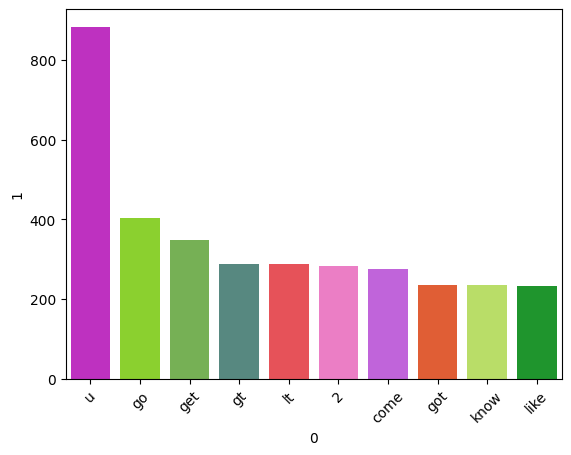

In [86]:
# Generate random colors
colors = np.random.rand(len(top_10), 3)  # Random RGB colors

# Create the bar plot with different colors
sns.barplot(x=top_10_ham[0], y=top_10_ham[1], palette=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [87]:
#Converting 'sms' text data into numeric
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
# Convert text data into TF-IDF vectors
x = tfidf.fit_transform(sms_df['sms_transformed']).toarray()

print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [88]:
y  = sms_df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
y.shape

(5169,)

In [90]:
#Train test split
from sklearn.model_selection import train_test_split


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (4135, 6708)
x_test: (1034, 6708)
y_train: (4135,)
y_test: (1034,)


In [93]:
#Training and evaluating model

# Logistic regression
from sklearn.linear_model import LogisticRegression


In [94]:
model_lr = LogisticRegression()

In [95]:
#Train the model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [96]:
#Testing
y_pred_lr = model_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [97]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [98]:
from sklearn.metrics import accuracy_score,precision_score

print("Accuracy score",accuracy_score(y_test,y_pred_lr))
print("Precision score",precision_score(y_test,y_pred_lr))

Accuracy score 0.9487427466150871
Precision score 0.9423076923076923


In [99]:
# Support Vector Machine(SVM)

from sklearn.svm import SVC

In [100]:

model_svm = SVC()

In [101]:
model_svm.fit(x_train,y_train)

SVC()

In [102]:
y_pred_svm = model_svm.predict(x_test)
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0])

In [103]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [104]:
print("Accuracy score",accuracy_score(y_test,y_pred_svm))
print("Precision score",precision_score(y_test,y_pred_svm))

Accuracy score 0.9680851063829787
Precision score 0.9912280701754386


In [105]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [106]:
#Define depth of the decision tree in random forest
model_rf = RandomForestClassifier(max_depth=10,random_state=0)

In [107]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [108]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [109]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [110]:
print("Accuracy score",accuracy_score(y_test,y_pred_rf))
print("Precision score",precision_score(y_test,y_pred_rf))

Accuracy score 0.8936170212765957
Precision score 1.0


In [111]:
#Bernoulli NB

from sklearn.naive_bayes import BernoulliNB

In [112]:
model_bnb = BernoulliNB()

In [113]:
model_bnb.fit(x_train,y_train)

BernoulliNB()

In [114]:
y_pred_bnb = model_bnb.predict(x_test)
y_pred_bnb

array([0, 1, 0, ..., 1, 0, 0])

In [115]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [116]:
print("Accuracy score",accuracy_score(y_test,y_pred_bnb))
print("Precision score",precision_score(y_test,y_pred_bnb))

Accuracy score 0.9661508704061895
Precision score 0.9661016949152542


In [117]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB

In [118]:
model_gnb = GaussianNB()

In [119]:
model_gnb.fit(x_train,y_train)

GaussianNB()

In [120]:
y_pred_gnb =model_gnb.predict(x_test)
y_pred_gnb

array([0, 0, 1, ..., 1, 0, 0])

In [121]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [122]:
print("Accuracy score",accuracy_score(y_test,y_pred_gnb))
print("Precision score",precision_score(y_test,y_pred_gnb))

Accuracy score 0.8636363636363636
Precision score 0.5084033613445378


In [123]:
#Multinomial NB
from sklearn.naive_bayes import MultinomialNB

In [124]:
model_mnb = MultinomialNB()

In [125]:
model_mnb.fit(x_train,y_train)


MultinomialNB()

In [126]:
y_pred_mnb = model_mnb.predict(x_test)
y_pred_mnb

array([0, 0, 0, ..., 1, 0, 0])

In [127]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [128]:
print("Accuracy score",accuracy_score(y_test,y_pred_mnb))
print("Precision score",precision_score(y_test,y_pred_mnb))

Accuracy score 0.9613152804642167
Precision score 0.9906542056074766


In [129]:
# Preparing model for deployment
import pickle

In [130]:
pickle.dump(model_mnb,open('model.sav', 'wb'))

In [131]:
#Saving the Tfidf Object for vectorizing 'input_sms' (converting text into numeric form)
pickle.dump(tfidf,open('tfidf_vectorizer.sav' , 'wb'))

In [132]:
#Checking whether our model is working fine or not
load_model_mnb = pickle.load(open('model.sav','rb'))
load_tfidf = pickle.load(open('tfidf_vectorizer.sav','rb'))

In [133]:
input_sms = "Congratulations! You've won a $1000 gift card. Click here to claim your prize now."

In [134]:
input_sms = transform_sms(input_sms)

In [135]:
input_sms

'congratul 1000 gift card click claim prize'

In [136]:
input_sms = load_tfidf.transform([input_sms])

In [137]:
pred = load_model_mnb.predict(input_sms)[0]

In [138]:
pred

np.int64(1)